In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('zxia323_722').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/13 16:39:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Read the file

In [2]:
# Importing data which has a header. Schema is automatically configured.
df = spark.read.csv('tokyo_weather.csv', header=True, inferSchema=True)


In [3]:
# Let's see the data. You'll notice nulls.
df.select('Date',
 'Average pressure',
 'Sea level pressure',
 'Rainfall',
 'Max rainfall (1 hour)',
 'Max rainfall (10 mins)',
 'Ave temp',
 'Max temp',
 'Min temp',
 'Ave humidity').show(10)


+---------+----------------+------------------+--------+---------------------+----------------------+--------+--------+--------+------------+
|     Date|Average pressure|Sea level pressure|Rainfall|Max rainfall (1 hour)|Max rainfall (10 mins)|Ave temp|Max temp|Min temp|Ave humidity|
+---------+----------------+------------------+--------+---------------------+----------------------+--------+--------+--------+------------+
| 1981/1/1|          1014.7|            1019.2|    null|                 null|                  null|     5.0|     8.9|     1.3|          51|
| 1981/1/2|           999.5|            1003.8|       2|                    2|                     1|     4.6|     7.5|     1.9|          81|
| 1981/1/3|           998.1|            1002.5|    null|                 null|                  null|     5.1|     9.0|     2.2|          40|
| 1981/1/4|          1004.8|            1009.3|    null|                 null|                  null|     4.4|     9.6|    -0.6|          47|
| 1981

In [4]:
df.select('Min humidity',
 'Ave wind speed',
 'Hours of sunlight',
 'Snowfall',
 'Max snow cover',
 'Gust x',
 'Gust y',
 'Max x',
 'Max y').show(10)

+------------+--------------+-----------------+--------+--------------+------------+------------+------------+------------+
|Min humidity|Ave wind speed|Hours of sunlight|Snowfall|Max snow cover|      Gust x|      Gust y|       Max x|       Max y|
+------------+--------------+-----------------+--------+--------------+------------+------------+------------+------------+
|        31.0|           2.5|              8.7|    null|          null| 6.744320587|-2.793589056| 4.527009709|-1.875148819|
|        42.0|           2.6|              3.5|    null|          null|-7.424621202|-7.424621202|-4.384062043|-4.384062043|
|        19.0|           4.8|              8.9|    null|          null|-9.545941546|-9.545941546|-4.808326112|-4.808326112|
|        32.0|           3.8|              8.6|    null|          null|  15.6135641|-6.467350007| 10.16267486|-4.209517756|
|        28.0|           3.1|              7.9|    null|          null| 10.71700258|-4.439127815| 6.929096494|-2.870125743|
|       

In [5]:
# Check the df columns
df.columns

['Date',
 'Average pressure',
 'Sea level pressure',
 'Rainfall',
 'Max rainfall (1 hour)',
 'Max rainfall (10 mins)',
 'Ave temp',
 'Max temp',
 'Min temp',
 'Ave humidity',
 'Min humidity',
 'Ave wind speed',
 'Hours of sunlight',
 'Snowfall',
 'Max snow cover',
 'Gust x',
 'Gust y',
 'Max x',
 'Max y']

In [6]:
# We can use the describe method get some general statistics on our data too. Remember to show the DataFrame!
df.describe().show()

+-------+--------+------------------+------------------+-----------------+---------------------+----------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+--------------------+
|summary|    Date|  Average pressure|Sea level pressure|         Rainfall|Max rainfall (1 hour)|Max rainfall (10 mins)|         Ave temp|          Max temp|          Min temp|      Ave humidity|      Min humidity|    Ave wind speed| Hours of sunlight|          Snowfall|   Max snow cover|            Gust x|             Gust y|             Max x|               Max y|
+-------+--------+------------------+------------------+-----------------+---------------------+----------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------

In [7]:
# We can use print schema to see data type
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Average pressure: double (nullable = true)
 |-- Sea level pressure: double (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- Max rainfall (1 hour): string (nullable = true)
 |-- Max rainfall (10 mins): string (nullable = true)
 |-- Ave temp: double (nullable = true)
 |-- Max temp: double (nullable = true)
 |-- Min temp: double (nullable = true)
 |-- Ave humidity: integer (nullable = true)
 |-- Min humidity: double (nullable = true)
 |-- Ave wind speed: double (nullable = true)
 |-- Hours of sunlight: string (nullable = true)
 |-- Snowfall: string (nullable = true)
 |-- Max snow cover: integer (nullable = true)
 |-- Gust x: double (nullable = true)
 |-- Gust y: double (nullable = true)
 |-- Max x: double (nullable = true)
 |-- Max y: double (nullable = true)



In [8]:
# Check the rainfall column
df.select( 'Rainfall',
 'Max rainfall (1 hour)',
 'Max rainfall (10 mins)',
 'Hours of sunlight',
 'Snowfall').show()

+--------+---------------------+----------------------+-----------------+--------+
|Rainfall|Max rainfall (1 hour)|Max rainfall (10 mins)|Hours of sunlight|Snowfall|
+--------+---------------------+----------------------+-----------------+--------+
|    null|                 null|                  null|              8.7|    null|
|       2|                    2|                     1|              3.5|    null|
|    null|                 null|                  null|              8.9|    null|
|    null|                 null|                  null|              8.6|    null|
|    null|                 null|                  null|              7.9|    null|
|    null|                 null|                  null|              7.9|    null|
|    null|                 null|                  null|              8.8|    null|
|    null|                 null|                  null|                9|    null|
|    null|                 null|                  null|              8.7|    null|
|   

In [9]:
# Check the number of null valuses
df.count()


14880

In [10]:
# Check the null vlaue number
df.na.drop().count()

52

In [11]:
# Check the missing value in each column
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----+----------------+------------------+--------+---------------------+----------------------+--------+--------+--------+------------+------------+--------------+-----------------+--------+--------------+------+------+-----+-----+
|Date|Average pressure|Sea level pressure|Rainfall|Max rainfall (1 hour)|Max rainfall (10 mins)|Ave temp|Max temp|Min temp|Ave humidity|Min humidity|Ave wind speed|Hours of sunlight|Snowfall|Max snow cover|Gust x|Gust y|Max x|Max y|
+----+----------------+------------------+--------+---------------------+----------------------+--------+--------+--------+------------+------------+--------------+-----------------+--------+--------------+------+------+-----+-----+
|   0|               0|                 0|    6949|                 6833|                  6933|       0|       0|       0|           0|           0|             0|             1761|   14577|         14693|     0|     0|    0|    0|
+----+----------------+------------------+--------+-----------------

In [12]:
# Plot Avg temp time service plot
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from matplotlib import pyplot as plt

In [13]:
weather = df.toPandas()

In [14]:
weather.set_index('Date', inplace = True)

In [15]:
weather.index = pd.DatetimeIndex(weather.index)


<AxesSubplot:xlabel='Date'>

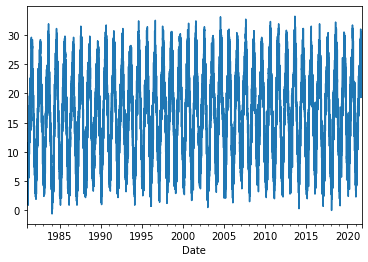

In [16]:
weather['Ave temp'].plot()

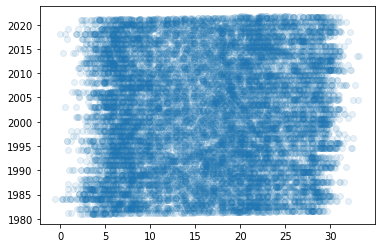

In [17]:
plt.scatter(weather['Ave temp'],weather.index,alpha=0.1)
plt.show()

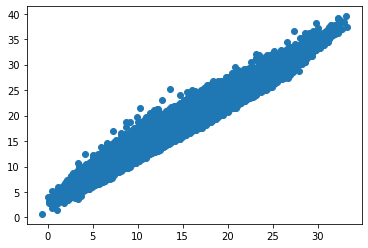

In [18]:
plt.scatter(weather['Ave temp'],weather['Max temp'])
plt.show()

Text(0, 0.5, 'Min temp')

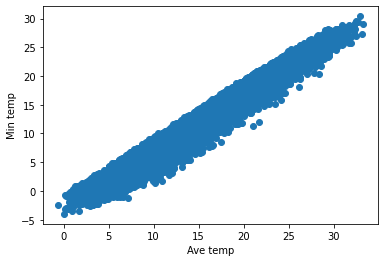

In [19]:
plt.scatter(weather['Ave temp'],weather['Min temp'])
#plt.show()
plt.xlabel("Ave temp")
plt.ylabel("Min temp")

Text(0, 0.5, 'Rainfall')

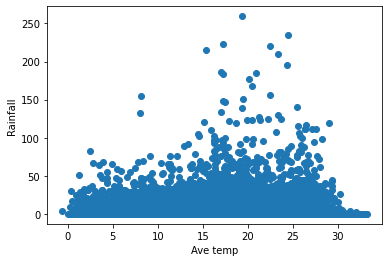

In [20]:
# Fill the missing value with zero
rainfall = weather['Rainfall'].fillna(0)
rainfall[5007] = 1.0
# Convert to numberic
pd.to_numeric(rainfall)
plt.scatter(weather['Ave temp'],rainfall)
#plt.show()
plt.xlabel("Ave temp")
plt.ylabel("Rainfall")

# Temperature

## Data VisualizationTemperature

In [21]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import skew
import itertools
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error

# Stats
from scipy.stats import skew
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Modelling 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
#from prophet import Prophet
#from prophet.diagnostics import cross_validation, performance_metrics


from warnings import filterwarnings, catch_warnings

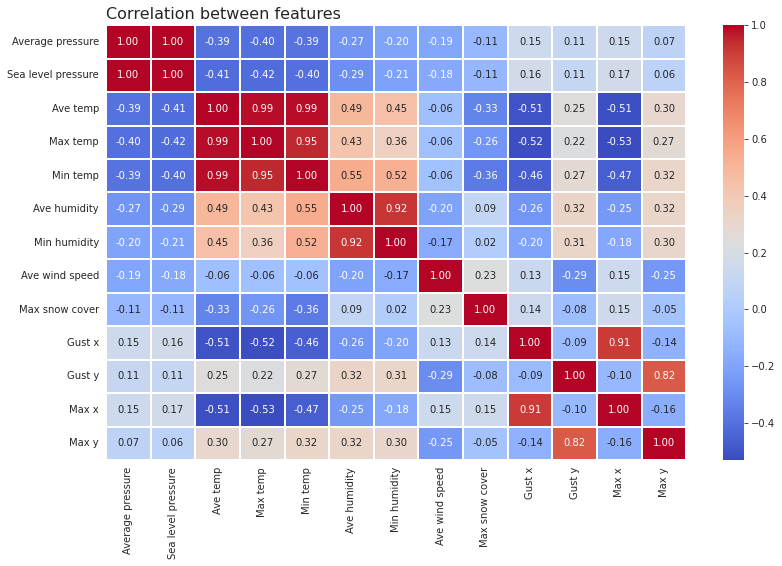

In [22]:
colours = sns.color_palette('inferno', n_colors=20)
plt.figure(figsize=(13, 8))
sns.heatmap(weather.corr(), annot=True, fmt='.2f', 
            linewidths=2, cmap='coolwarm')
plt.title('Correlation between features', loc='left', 
         fontsize=16)
plt.show()

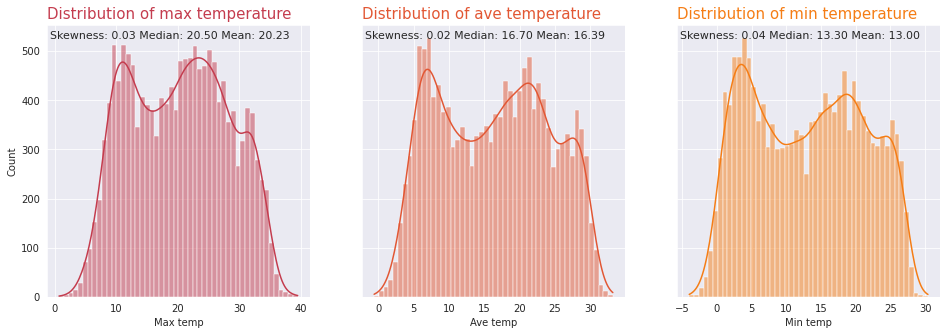

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), sharey=True)

sns.histplot(weather['Max temp'], bins=50, kde=True,
            ax=ax[0], color=colours[10])
ax[0].set_title('Distribution of max temperature', loc='left', 
                fontsize=15, color=colours[10])
ax[0].text(0.01, 0.95, "Skewness: {:4.2f} Median: {:4.2f} Mean: {:4.2f}".\
        format(skew(weather['Max temp']), weather['Max temp'].median(), weather['Max temp'].mean()),
        fontsize=11, transform=ax[0].transAxes)

sns.histplot(weather['Ave temp'], bins=50, kde=True,
            ax=ax[1], color=colours[12])
ax[1].set_title('Distribution of ave temperature', loc='left', 
                fontsize=15, color=colours[12])
ax[1].text(0.01, 0.95, "Skewness: {:4.2f} Median: {:4.2f} Mean: {:4.2f}".\
        format(skew(weather['Ave temp']), weather['Ave temp'].median(), weather['Ave temp'].mean()),
        fontsize=11, transform=ax[1].transAxes)

sns.histplot(weather['Min temp'], bins=50, kde=True,
            ax=ax[2], color=colours[14])
ax[2].set_title('Distribution of min temperature', loc='left', 
                fontsize=15, color=colours[14])
ax[2].text(0.01, 0.95, "Skewness: {:4.2f} Median: {:4.2f} Mean: {:4.2f}".\
        format(skew(weather['Min temp']), weather['Min temp'].median(), weather['Min temp'].mean()),
        fontsize=11, transform=ax[2].transAxes)

plt.show()

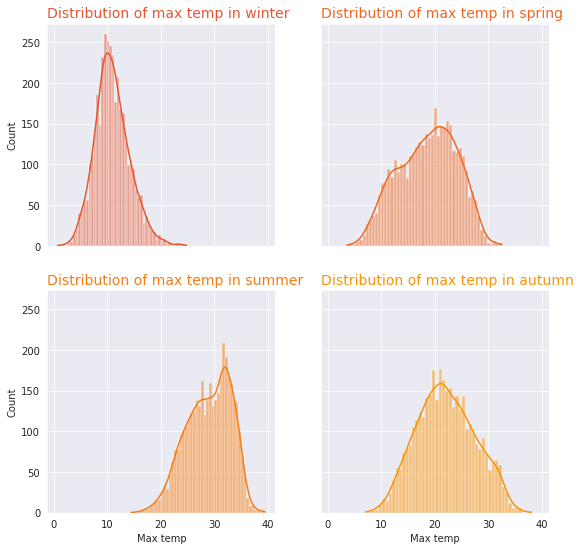

In [24]:
winter = weather[weather.index.month.isin([12, 1, 2])]
spring = weather[weather.index.month.isin([3, 4, 5])]
summer = weather[weather.index.month.isin([6, 7, 8])]
autumn = weather[weather.index.month.isin([9, 10, 11])]
seasons = [winter, spring, summer, autumn]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 9), sharey=True, sharex=True)
names = 'winter spring summer autumn'.split()
for n, ax in enumerate(axs.reshape(-1)):
    sns.histplot(seasons[n]['Max temp'], bins=50, kde=True,
                ax=ax, color=colours[12 + n])
    ax.set_title(f'Distribution of max temp in {names[n]}', 
                loc='left', fontsize=14, color=colours[12 + n])

# Long term in max temperature trends in Tokyo vs.Nightrainfall levels

In [25]:
# Read the nightRainfall
nightrainfall = pd.read_excel(r'./NightRainfall.xlsx',index_col=0,parse_dates=True)

In [26]:
# Create spark data frame
dfnightrainfall = spark.createDataFrame(nightrainfall)

In [27]:
nightrainfall = nightrainfall.asfreq('d')

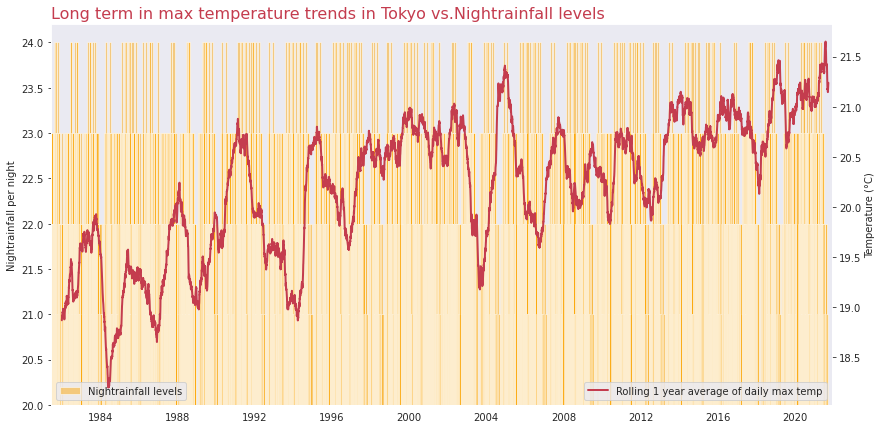

In [28]:
annual_average_max = weather['Max temp'].rolling(365).mean()

fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(x=nightrainfall.index, height=nightrainfall['Nightrain'], 
       width=40, color=colours[16], bottom=20,
       label='Nightrainfall levels', alpha=0.5)
ax.set_ylabel('Nightrainfall per night')
#ax.set_ylim(350, 450)
ax.grid(False)
plt.legend(loc='lower left')

ax2 = ax.twinx()
ax2.plot(annual_average_max, color=colours[10], 
         linewidth=2, label='Rolling 1 year average of daily max temp')
ax2.set_title('Long term in max temperature trends in Tokyo vs.Nightrainfall levels', 
              loc='left', fontsize=16, color=colours[10])
ax2.set_ylabel('Temperature (°C)')
ax2.set_xlim(datetime(1981, 6, 1), datetime(2021, 12, 1))
ax2.grid(False)
plt.legend(ncol=4, loc='lower right')

plt.show()

# Progression of maximum daily temperatures in Tokyo

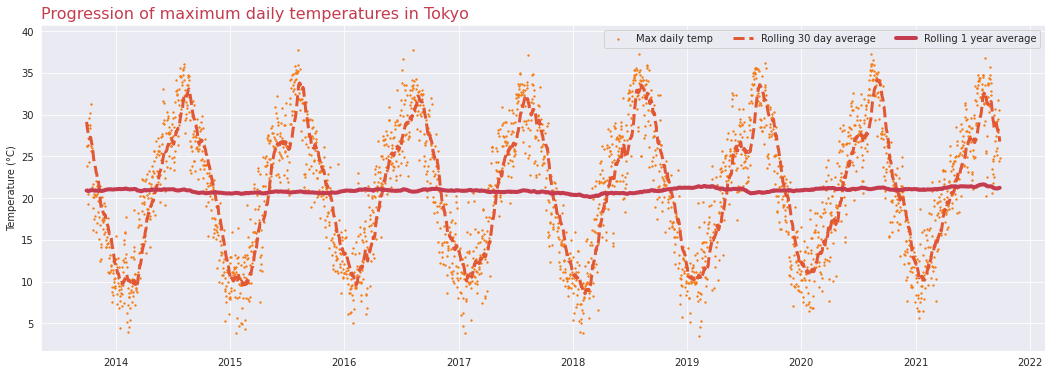

In [29]:
YEAR = 365.2422
nyears = 8
window = int(YEAR * nyears)
thirty_day_max = weather['Max temp'].rolling(30).mean()

fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter(x=weather.index[-window:], y=weather['Max temp'].values[-window:], 
           marker='.', color=colours[14], label='Max daily temp',
           s=7)
ax.plot(thirty_day_max[-window:], color=colours[12], 
        linestyle='--', linewidth=3, label='Rolling 30 day average')
ax.plot(annual_average_max[-window:], color=colours[10], 
        linewidth=4, label='Rolling 1 year average')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Progression of maximum daily temperatures in Tokyo', 
             fontsize=16, loc='left', color=colours[10])
plt.legend(ncol=3, loc='upper right')
plt.show()

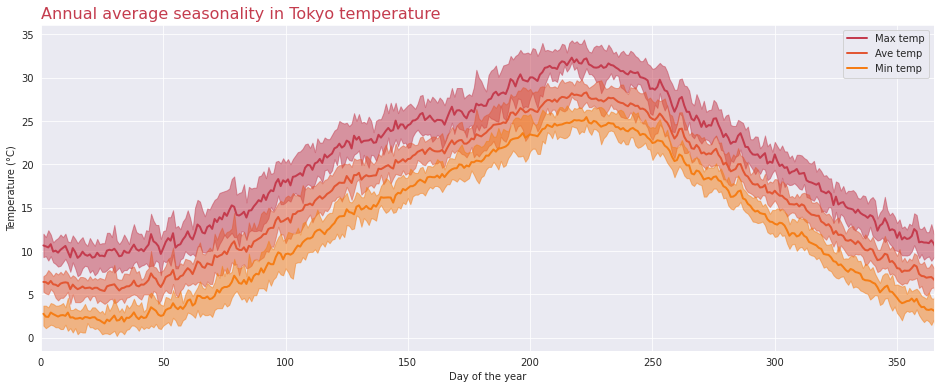

In [30]:
seasonality = weather[['Max temp', 'Ave temp', 'Min temp']].groupby(weather.index.dayofyear).describe()

fig, ax = plt.subplots(figsize=(16, 6))
ax.fill_between(x=seasonality.index.values, y1=seasonality.loc[:, ('Max temp', '25%')],
               y2=seasonality.loc[:, ('Max temp', '75%')], color=colours[10], alpha=0.5)
ax.plot(seasonality.loc[:, ('Max temp', 'mean')], color=colours[10],
         linewidth=2, label='Max temp')
ax.fill_between(x=seasonality.index.values, y1=seasonality.loc[:, ('Ave temp', '25%')],
               y2=seasonality.loc[:, ('Ave temp', '75%')], color=colours[12], alpha=0.5)
ax.plot(seasonality.loc[:, ('Ave temp', 'mean')], color=colours[12],
         linewidth=2, label='Ave temp')
ax.fill_between(x=seasonality.index.values, y1=seasonality.loc[:, ('Min temp', '25%')],
               y2=seasonality.loc[:, ('Min temp', '75%')], color=colours[14], alpha=0.5)
ax.plot(seasonality.loc[:, ('Min temp', 'mean')], color=colours[14],
         linewidth=2, label='Min temp')

ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('Day of the year')
ax.set_title('Annual average seasonality in Tokyo temperature', loc='left', fontsize=16,
            color=colours[10])
ax.set_xlim(0, 365)
plt.legend()
plt.show()

 # Verifying Data rationality

In [31]:
weather.isna().sum()

Average pressure              0
Sea level pressure            0
Rainfall                   6949
Max rainfall (1 hour)      6833
Max rainfall (10 mins)     6933
Ave temp                      0
Max temp                      0
Min temp                      0
Ave humidity                  0
Min humidity                  0
Ave wind speed                0
Hours of sunlight          1761
Snowfall                  14577
Max snow cover            14693
Gust x                        0
Gust y                        0
Max x                         0
Max y                         0
dtype: int64

In [32]:
# Fill the missing value with zero
rainfall = weather['Rainfall'].fillna(0)
#pd.to_numeric(rainfall)

In [33]:
weather['Rainfall'][5000:5010]

Date
1994-09-10        0
1994-09-11        0
1994-09-12       13
1994-09-13       29
1994-09-14       25
1994-09-15     21.5
1994-09-16      6.5
1994-09-17    1.0 ]
1994-09-18        0
1994-09-19      0.5
Name: Rainfall, dtype: object

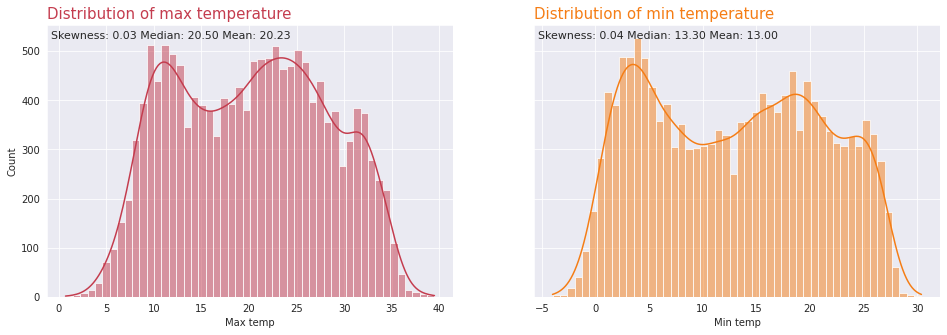

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), sharey=True)

sns.histplot(weather['Max temp'], bins=50, kde=True,
            ax=ax[0], color=colours[10])
ax[0].set_title('Distribution of max temperature', loc='left', 
                fontsize=15, color=colours[10])
ax[0].text(0.01, 0.95, "Skewness: {:4.2f} Median: {:4.2f} Mean: {:4.2f}".\
        format(skew(weather['Max temp']), weather['Max temp'].median(), weather['Max temp'].mean()),
        fontsize=11, transform=ax[0].transAxes)

sns.histplot(weather['Min temp'], bins=50, kde=True,
            ax=ax[1], color=colours[14])
ax[1].set_title('Distribution of min temperature', loc='left', 
                fontsize=15, color=colours[14])
ax[1].text(0.01, 0.95, "Skewness: {:4.2f} Median: {:4.2f} Mean: {:4.2f}".\
        format(skew(weather['Min temp']), weather['Min temp'].median(), weather['Min temp'].mean()),
        fontsize=11, transform=ax[1].transAxes)

plt.show()

# 3. Data Preparation

In [35]:
df.describe().show()

+-------+--------+------------------+------------------+-----------------+---------------------+----------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+--------------------+
|summary|    Date|  Average pressure|Sea level pressure|         Rainfall|Max rainfall (1 hour)|Max rainfall (10 mins)|         Ave temp|          Max temp|          Min temp|      Ave humidity|      Min humidity|    Ave wind speed| Hours of sunlight|          Snowfall|   Max snow cover|            Gust x|             Gust y|             Max x|               Max y|
+-------+--------+------------------+------------------+-----------------+---------------------+----------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------

In [36]:
# Also, it's good practice to use your sales average to fill missing data. 
from pyspark.sql.functions import mean

# Let's collect the average. You'll notice that the collection returns the average in an interesting format.
mean_Rainfall = df.select(mean(df['Rainfall'])).collect()
mean_Rainfall_val = mean_Rainfall[0][0]

# Let's collect the average. You'll notice that the collection returns the average in an interesting format.
mean_MaxrainfallHour = df.select(mean(df['Max rainfall (1 hour)'])).collect()
mean_MaxrainfallHour_val = mean_MaxrainfallHour[0][0]

# Let's collect the average. You'll notice that the collection returns the average in an interesting format.
mean_MaxrainfallMins = df.select(mean(df['Max rainfall (10 mins)'])).collect()
mean_MaxrainfallMins_val = mean_MaxrainfallMins[0][0]

# Let's collect the average. You'll notice that the collection returns the average in an interesting format.
mean_Hoursofsunlight= df.select(mean(df['Hours of sunlight'])).collect()
mean_Hoursofsunlight_val = mean_Hoursofsunlight[0][0]

In [37]:
print(mean_Rainfall_val)
print(mean_MaxrainfallHour_val)
print(mean_MaxrainfallMins_val)
print(mean_Hoursofsunlight_val)

8.054539722572509
2.9653736168096483
1.1529648747324688
6.029999999999993


In [38]:
df = df.na.fill(str(mean_Rainfall_val), subset=['Rainfall'])
df = df.na.fill(str(mean_MaxrainfallHour_val), subset=['Max rainfall (1 hour)'])
df = df.na.fill(str(mean_MaxrainfallMins_val), subset=['Max rainfall (10 mins)'])
df = df.na.fill(str(mean_Hoursofsunlight_val), subset=['Hours of sunlight'])

In [39]:
df.show(5)

+--------+----------------+------------------+-----------------+---------------------+----------------------+--------+--------+--------+------------+------------+--------------+-----------------+--------+--------------+------------+------------+------------+------------+
|    Date|Average pressure|Sea level pressure|         Rainfall|Max rainfall (1 hour)|Max rainfall (10 mins)|Ave temp|Max temp|Min temp|Ave humidity|Min humidity|Ave wind speed|Hours of sunlight|Snowfall|Max snow cover|      Gust x|      Gust y|       Max x|       Max y|
+--------+----------------+------------------+-----------------+---------------------+----------------------+--------+--------+--------+------------+------------+--------------+-----------------+--------+--------------+------------+------------+------------+------------+
|1981/1/1|          1014.7|            1019.2|8.054539722572509|   2.9653736168096483|    1.1529648747324688|     5.0|     8.9|     1.3|          51|        31.0|           2.5|       

In [40]:
# We can use print schema to see data type
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Average pressure: double (nullable = true)
 |-- Sea level pressure: double (nullable = true)
 |-- Rainfall: string (nullable = false)
 |-- Max rainfall (1 hour): string (nullable = false)
 |-- Max rainfall (10 mins): string (nullable = false)
 |-- Ave temp: double (nullable = true)
 |-- Max temp: double (nullable = true)
 |-- Min temp: double (nullable = true)
 |-- Ave humidity: integer (nullable = true)
 |-- Min humidity: double (nullable = true)
 |-- Ave wind speed: double (nullable = true)
 |-- Hours of sunlight: string (nullable = false)
 |-- Snowfall: string (nullable = true)
 |-- Max snow cover: integer (nullable = true)
 |-- Gust x: double (nullable = true)
 |-- Gust y: double (nullable = true)
 |-- Max x: double (nullable = true)
 |-- Max y: double (nullable = true)



In [41]:
df = df.na.fill(str(0), subset=['Snowfall'])
df = df.na.fill(0, subset=['Max snow cover'])

In [42]:
df.show(5)

+--------+----------------+------------------+-----------------+---------------------+----------------------+--------+--------+--------+------------+------------+--------------+-----------------+--------+--------------+------------+------------+------------+------------+
|    Date|Average pressure|Sea level pressure|         Rainfall|Max rainfall (1 hour)|Max rainfall (10 mins)|Ave temp|Max temp|Min temp|Ave humidity|Min humidity|Ave wind speed|Hours of sunlight|Snowfall|Max snow cover|      Gust x|      Gust y|       Max x|       Max y|
+--------+----------------+------------------+-----------------+---------------------+----------------------+--------+--------+--------+------------+------------+--------------+-----------------+--------+--------------+------------+------------+------------+------------+
|1981/1/1|          1014.7|            1019.2|8.054539722572509|   2.9653736168096483|    1.1529648747324688|     5.0|     8.9|     1.3|          51|        31.0|           2.5|       

In [43]:
# Check the null vlaue number
df.na.drop().count()

14880

In [44]:
df.count()

14880

In [45]:
df.show(10)

+---------+----------------+------------------+-----------------+---------------------+----------------------+--------+--------+--------+------------+------------+--------------+-----------------+--------+--------------+------------+------------+------------+------------+
|     Date|Average pressure|Sea level pressure|         Rainfall|Max rainfall (1 hour)|Max rainfall (10 mins)|Ave temp|Max temp|Min temp|Ave humidity|Min humidity|Ave wind speed|Hours of sunlight|Snowfall|Max snow cover|      Gust x|      Gust y|       Max x|       Max y|
+---------+----------------+------------------+-----------------+---------------------+----------------------+--------+--------+--------+------------+------------+--------------+-----------------+--------+--------------+------------+------------+------------+------------+
| 1981/1/1|          1014.7|            1019.2|8.054539722572509|   2.9653736168096483|    1.1529648747324688|     5.0|     8.9|     1.3|          51|        31.0|           2.5|   

In [46]:
df.describe().show()

+-------+--------+------------------+------------------+-----------------+---------------------+----------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+-------------------+------------------+--------------------+
|summary|    Date|  Average pressure|Sea level pressure|         Rainfall|Max rainfall (1 hour)|Max rainfall (10 mins)|         Ave temp|          Max temp|          Min temp|      Ave humidity|      Min humidity|    Ave wind speed|Hours of sunlight|          Snowfall|     Max snow cover|            Gust x|             Gust y|             Max x|               Max y|
+-------+--------+------------------+------------------+-----------------+---------------------+----------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------

In [47]:
df.describe("Hours of sunlight").show()

+-------+-----------------+
|summary|Hours of sunlight|
+-------+-----------------+
|  count|            14880|
|   mean|6.029999999999887|
| stddev|3.537042408947817|
|    min|                0|
|    max|              9.9|
+-------+-----------------+



(array([12536.,   997.,   664.,   240.,   172.,   113.,    50.,    47.,
           36.,    25.]),
 array([  0. ,  21.9,  43.8,  65.7,  87.6, 109.5, 131.4, 153.3, 175.2,
        197.1, 219. ]),
 <BarContainer object of 10 artists>)

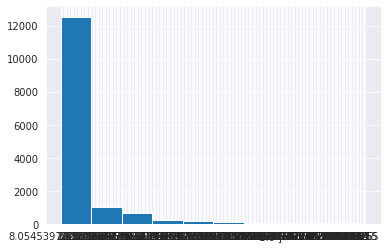

In [48]:
# Check the diftribution of the rainfall
weatherClean = df.toPandas()
plt.hist(weatherClean['Rainfall'])

In [49]:
# Read the nightRainfall
nightrainfall = pd.read_excel(r'./NightRainfall.xlsx')
# Create spark data frame
dfnightrainfall = spark.createDataFrame(nightrainfall)

In [50]:
dfnightrainfall.show()

+-------------------+---------+
|               Date|Nightrain|
+-------------------+---------+
|1981-01-01 00:00:00|        1|
|1981-01-02 00:00:00|        0|
|1981-01-03 00:00:00|        0|
|1981-01-04 00:00:00|        0|
|1981-01-05 00:00:00|        0|
|1981-01-06 00:00:00|        0|
|1981-01-07 00:00:00|        0|
|1981-01-08 00:00:00|        0|
|1981-01-09 00:00:00|        0|
|1981-01-10 00:00:00|        0|
|1981-01-11 00:00:00|        0|
|1981-01-12 00:00:00|        0|
|1981-01-13 00:00:00|        0|
|1981-01-14 00:00:00|        0|
|1981-01-15 00:00:00|        2|
|1981-01-16 00:00:00|        0|
|1981-01-17 00:00:00|        0|
|1981-01-18 00:00:00|        0|
|1981-01-19 00:00:00|        0|
|1981-01-20 00:00:00|        0|
+-------------------+---------+
only showing top 20 rows



(array([10573.,     0.,   612.,     0.,     0.,  2141.,     0.,  1355.,
            0.,   199.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

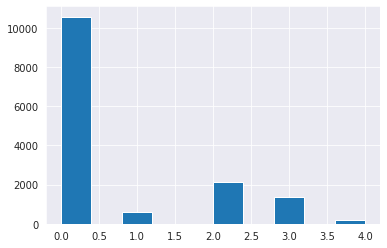

In [51]:
plt.hist(nightrainfall['Nightrain'])

In [52]:
df1 = df.toPandas()
df2 = nightrainfall['Nightrain']

In [132]:
# Merge two data set
dfNewData = pd.concat([df1,df2],axis=1)

In [157]:
# Merge two data set
# Create spark data frame
dfNew = spark.createDataFrame(dfNewData)
dfNew.show(5)

+--------+----------------+------------------+-----------------+---------------------+----------------------+--------+--------+--------+------------+------------+--------------+-----------------+--------+--------------+------------+------------+------------+------------+---------+
|    Date|Average pressure|Sea level pressure|         Rainfall|Max rainfall (1 hour)|Max rainfall (10 mins)|Ave temp|Max temp|Min temp|Ave humidity|Min humidity|Ave wind speed|Hours of sunlight|Snowfall|Max snow cover|      Gust x|      Gust y|       Max x|       Max y|Nightrain|
+--------+----------------+------------------+-----------------+---------------------+----------------------+--------+--------+--------+------------+------------+--------------+-----------------+--------+--------------+------------+------------+------------+------------+---------+
|1981/1/1|          1014.7|            1019.2|8.054539722572509|   2.9653736168096483|    1.1529648747324688|     5.0|     8.9|     1.3|          51|     

22/10/13 17:51:46 WARN TaskSetManager: Stage 92 contains a task of very large size (1159 KiB). The maximum recommended task size is 1000 KiB.


<AxesSubplot:>

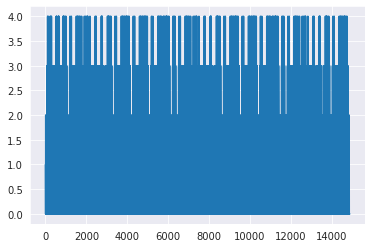

In [158]:
dfNewData['Nightrain'].plot()

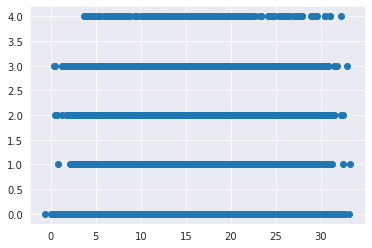

In [195]:
# Nightrain vs Avg temp
plt.scatter(dfNewData['Ave temp'],dfNewData['Nightrain'])
plt.show()

In [196]:
dfNew.printSchema()

root
 |-- Average_pressure: double (nullable = true)
 |-- Sea_level_pressure: double (nullable = true)
 |-- Rainfall: double (nullable = true)
 |-- Max_rainfall_1_hour: double (nullable = true)
 |-- Max_rainfall_10_mins: double (nullable = true)
 |-- Ave_temp: double (nullable = true)
 |-- Max_temp: double (nullable = true)
 |-- Min_temp: double (nullable = true)
 |-- Ave_humidity: long (nullable = true)
 |-- Min_humidity: double (nullable = true)
 |-- Ave_wind_speed: double (nullable = true)
 |-- Hours_of_sunlight: double (nullable = true)
 |-- Snowfall: double (nullable = true)
 |-- Max_snow_cover: double (nullable = true)
 |-- Gust_x: double (nullable = true)
 |-- Gust_y: double (nullable = true)
 |-- Max_x: double (nullable = true)
 |-- Max_y: double (nullable = true)
 |-- Nightrain: double (nullable = true)
 |-- Ave_tempIndex: double (nullable = false)



In [197]:
# Rename the col name
dfNew = dfNew.toDF('Date',
 'Average_pressure',
 'Sea_level_pressure',
 'Rainfall',
 'Max_rainfall_1_hour',
 'Max_rainfall_10_mins',
 'Ave_temp',
 'Max_temp',
 'Min_temp',
 'Ave_humidity',
 'Min_humidity',
 'Ave_wind_speed',
 'Hours_of_sunlight',
 'Snowfall',
 'Max_snow_cover',
 'Gust_x',
 'Gust_y',
 'Max_x',
 'Max_y',
 'Nightrain')

In [198]:
# Convet the data type
from pyspark.sql.types import IntegerType, BooleanType, DateType, ArrayType
dfNew = dfNew.withColumn("Rainfall", dfNew.Rainfall.cast("double "))
dfNew = dfNew.withColumn("Snowfall", dfNew.Rainfall.cast("double "))
dfNew = dfNew.withColumn("Nightrain", dfNew.Nightrain.cast("int "))
dfNew = dfNew.withColumn("Max_rainfall_1_hour", dfNew.Max_rainfall_1_hour.cast("double "))
dfNew = dfNew.withColumn("Max_rainfall_10_mins", dfNew.Max_rainfall_10_mins.cast("double "))
dfNew = dfNew.withColumn("Hours_of_sunlight", dfNew.Hours_of_sunlight.cast("double "))
dfNew = dfNew.withColumn("Max_snow_cover", dfNew.Max_snow_cover.cast("double "))
dfNew = dfNew.withColumn("Nightrain", dfNew.Nightrain.cast("double "))

In [199]:
dfNew.printSchema()

root
 |-- Date: double (nullable = true)
 |-- Average_pressure: double (nullable = true)
 |-- Sea_level_pressure: double (nullable = true)
 |-- Rainfall: double (nullable = true)
 |-- Max_rainfall_1_hour: double (nullable = true)
 |-- Max_rainfall_10_mins: double (nullable = true)
 |-- Ave_temp: double (nullable = true)
 |-- Max_temp: double (nullable = true)
 |-- Min_temp: long (nullable = true)
 |-- Ave_humidity: double (nullable = true)
 |-- Min_humidity: double (nullable = true)
 |-- Ave_wind_speed: double (nullable = true)
 |-- Hours_of_sunlight: double (nullable = true)
 |-- Snowfall: double (nullable = true)
 |-- Max_snow_cover: double (nullable = true)
 |-- Gust_x: double (nullable = true)
 |-- Gust_y: double (nullable = true)
 |-- Max_x: double (nullable = true)
 |-- Max_y: double (nullable = true)
 |-- Nightrain: double (nullable = true)



# 4.Data transformation

In [204]:
dfNew = dfNew.rdd.map(lambda x: (x.Average_pressure,x.Sea_level_pressure,x.Rainfall,x.Max_rainfall_1_hour,\
                                x.Max_rainfall_10_mins,x.Ave_temp,x.Max_temp,x.Min_temp,x.Ave_humidity,\
                                x.Min_humidity,x.Ave_wind_speed,x.Hours_of_sunlight,x.Snowfall,x.Max_snow_cover,x.Gust_x,\
                                x.Gust_y,x.Max_x,x.Max_y,x.Nightrain)).toDF(['Average_pressure','Sea_level_pressure','Rainfall','Max_rainfall_1_hour',\
 'Max_rainfall_10_mins','Ave_temp','Max_temp','Min_temp','Ave_humidity',\
 'Min_humidity','Ave_wind_speed','Hours_of_sunlight','Snowfall','Max_snow_cover','Gust_x',\
 'Gust_y','Max_x','Max_y','Nightrain'])

22/10/13 18:12:44 WARN TaskSetManager: Stage 106 contains a task of very large size (1159 KiB). The maximum recommended task size is 1000 KiB.


In [205]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Ave_temp", outputCol="Ave_tempIndex")
dfNew = indexer.fit(dfNew).transform(dfNew)

22/10/13 18:12:47 WARN TaskSetManager: Stage 107 contains a task of very large size (1159 KiB). The maximum recommended task size is 1000 KiB.


In [206]:
dfNew.printSchema()

root
 |-- Average_pressure: double (nullable = true)
 |-- Sea_level_pressure: double (nullable = true)
 |-- Rainfall: double (nullable = true)
 |-- Max_rainfall_1_hour: double (nullable = true)
 |-- Max_rainfall_10_mins: double (nullable = true)
 |-- Ave_temp: double (nullable = true)
 |-- Max_temp: double (nullable = true)
 |-- Min_temp: long (nullable = true)
 |-- Ave_humidity: double (nullable = true)
 |-- Min_humidity: double (nullable = true)
 |-- Ave_wind_speed: double (nullable = true)
 |-- Hours_of_sunlight: double (nullable = true)
 |-- Snowfall: double (nullable = true)
 |-- Max_snow_cover: double (nullable = true)
 |-- Gust_x: double (nullable = true)
 |-- Gust_y: double (nullable = true)
 |-- Max_x: double (nullable = true)
 |-- Max_y: double (nullable = true)
 |-- Nightrain: double (nullable = true)
 |-- Ave_tempIndex: double (nullable = false)



In [207]:
from pyspark.ml.feature import VectorAssembler
features = ['Average_pressure','Sea_level_pressure','Rainfall','Max_rainfall_1_hour',\
 'Max_rainfall_10_mins','Ave_temp','Max_temp','Min_temp','Ave_humidity',\
 'Min_humidity','Ave_wind_speed','Hours_of_sunlight','Snowfall','Max_snow_cover','Gust_x',\
 'Gust_y','Max_x','Max_y','Nightrain']
assembler = VectorAssembler(inputCols=features, outputCol="features")
output = assembler.transform(dfNew)
dfNew2 = output.select("features",'Ave_tempIndex')


In [208]:
final_data = dfNew2

In [173]:
final_data.head()

22/10/13 17:55:54 WARN TaskSetManager: Stage 100 contains a task of very large size (1159 KiB). The maximum recommended task size is 1000 KiB.


Row(features=DenseVector([1014.7, 1019.2, 8.0545, 2.9654, 1.153, 5.0, 8.9, 1.3, 51.0, 31.0, 2.5, 8.7, 8.0545, 0.0, 6.7443, -2.7936, 4.527, -1.8751, 1.0]), Ave_tempIndex=108.0)

In [174]:
dfNew2.select("features").head()

22/10/13 17:56:06 WARN TaskSetManager: Stage 101 contains a task of very large size (1159 KiB). The maximum recommended task size is 1000 KiB.


Row(features=DenseVector([1014.7, 1019.2, 8.0545, 2.9654, 1.153, 5.0, 8.9, 1.3, 51.0, 31.0, 2.5, 8.7, 8.0545, 0.0, 6.7443, -2.7936, 4.527, -1.8751, 1.0]))

/tmp/ipykernel_1316/2281009449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Rainfall"][5007] = 1.0
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


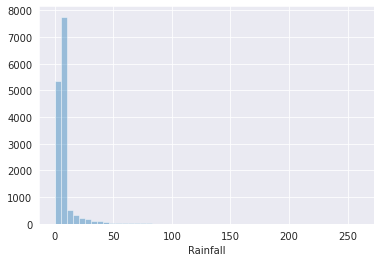

In [175]:
data = df.toPandas()
data["Rainfall"][5007] = 1.0
sns.distplot(data["Rainfall"],hist=True, kde=False)
plt.show()

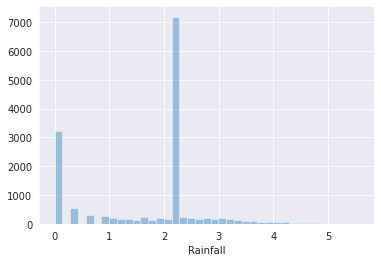

In [176]:
from math import log
data["Rainfall"] = pd.to_numeric( data["Rainfall"], errors='coerce').astype('float32')
logData = data["Rainfall"].apply(np.log1p)
sns.distplot(logData,hist=True, kde=False)
plt.show()

# 7. Data Mining

### Format data
### Reduce the data
### Train, test
### Model
###  Evaluation

In [216]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.regression import LinearRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

In [ ]:
#split the data set
train_data,test_data = final_data.randomSplit([0.7,0.3])
train2_data,test2_data = final_data.randomSplit([0.8,0.2])

In [ ]:
# Instance of logistic regression model. This is where you specify features/label/prediction columns.
lr = LogisticRegression(labelCol='Ave_tempIndex',featuresCol='features')


# Fit the model. Note that the train/test split isn't part of the documentation example.
lrModel = lr.fit(train_data)

trainingSummary = lrModel.summary

# Raw prediction and probability have to do with logistic regression. 
# As with other models, we simply want to compare the label (actual) to the prediction.
trainingSummary.predictions.printSchema()

In [ ]:
# Label and prediction are stacked on each other. 
trainingSummary.predictions.show()

In [193]:
# These are the default values:
# featuresCol: What is the features column named? 
# labelCol: What is the label column named?
# predictionCol: What is the name of the actual prediction?
lr = LinearRegression(featuresCol='features', labelCol='Ave_tempIndex', predictionCol='prediction')

In [ ]:
# Fit/train the model. Fit the model onto the training data.
lrModel = lr.fit(dfNew2)

In [184]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {}".format(str(lrModel.coefficients))) # For each feature...
print('\n')
print("Intercept:{}".format(str(lrModel.intercept)))

In [ ]:
trainingSummary.residuals.show()

# Print Root Mean Squared Error. 
print("RMSE: {}".format(trainingSummary.rootMeanSquaredError))

# Print R-Squared.
print("r2: {}".format(trainingSummary.r2))

In [189]:
train_data,test_data = final_data.randomSplit([0.7,0.3])
train2_data,test2_data = final_data.randomSplit([0.8,0.2])

In [192]:
train_data

DataFrame[features: vector, Ave_tempIndex: double]

In [190]:
# Use defaults to make the comparison "fair". This simplifies the comparison process.
dtc = DecisionTreeClassifier(labelCol='Ave temp',featuresCol='features',numTrees=100)
rfc = RandomForestClassifier(labelCol='Ave_tempIndex',featuresCol='features',numTrees=100)

In [ ]:
# Train the models (it's three models, so it might take some time).
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
# According to this evaluation metric, the area under the curve is 1.0. A perfect fit? Is that realistic?  
evaluator = BinaryClassificationEvaluator()
my_final_roc = evaluator.evaluate(predictions_and_labels.predictions)
my_final_roc

In [ ]:
rfc_predictions = rfc_model.transform(test_data)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Ave_tempIndex')
my_binary_eval.evaluate(rfc_predictions)